## Contexts

The Vcsn platform relies on a central concept: "contexts".  They denote typing information about automata, rational expressions, etc.  This information is alike a function type: an input type (the _label_), and an output type (the _weight_).

Contexts are created by the `vcsn.context` function which takes a string as input.  This string follows the following syntax:

    <context> ::= <labelset> , <weightset>
    
i.e., a context name is composed of a labelset name, then a comma, then a weightset name.

## Labelsets

Different _LabelSets_ model multiple variations on _labels_,
members of a monoid:

* `letterset<` _genset_ `>`<br>
  Denoted by $A^?$, defined by an alphabet $A$, its
  labels being either letters or the empty word.  This corresponds to what
  is often called $\varepsilon$-NFAs.
  
* `wordset<` _genset_ `>` <br>
  Denoted by $A^*$, also defined by an alphabet $A$, its labels
  being (possibly empty) words on this alphabet.

* `oneset`<br>
  Denoted by $\{1\}$, containing a single label: 1, the empty word.

* `tupleset<` _labelset1_ `, ` _labelset2_ `, ..., ` _labelsetn_ `>` <br>
  Cartesian product of LabelSets, $L_1 \times \cdots \times
  L_n$. This type implements the concept of transducers with an arbitrary
  number of "tapes". The concept is developed more in-depth here: [Transducers](Transducers.ipynb).

## Gensets

The gensets define the types of the letters, and sets of the valid letters.  There is currently a single genset type.

* `char_letters`<br>
  Specify that the letters are implemented as `char`.  Any `char` will be accepted.  The genset is said to be "open".

* `char_letters(abc...)`<br>
  Specify that the letters are implemented as `char`, and the genset is closed to `{a, b, c}`.  Any other `char` will be rejected.

## Abbreviations for Labelsets

There are a few abbreviations that are accepted.

* `lal_char`: `letterset<char_letters>`
* `lal_char(abc)`: `letterset<char_letters(abc)>`
* `law_char`: `wordset<letterset<char_letters>>`

## Weightsets

The _WeightSets_ define the semiring of the weights.  Builtin weights include:

* `b` <br/>
  The classical Booleans: $\langle \mathbb{B}, \vee, \wedge, \bot, \top \rangle$

* `z` <br/>
  The integers coded as `int`s: $\langle \mathbb{Z}, +, \times, 0, 1 \rangle$

* `q`<br/>
  The rationals, coded as pairs of `int`s: $\langle \mathbb{Q}, +, \times, 0, 1 \rangle$
  
* `qmp`<br/>
  The rationals, with support for multiprecision: $\langle \mathbb{Q}_\text{mp}, +, \times, 0, 1 \rangle$
  
* `r` <br/>
  The reals, coded as `double`s: $\langle \mathbb{R}, +, \times, 0, 1 \rangle$
  
* `nmin` <br/>
  The tropical semiring, coded as `unsigned int`s: $\langle \mathbb{N} \cup \{\infty\}, \min, +, \infty, 0 \rangle$
  
* `zmin` <br/>
  The tropical semiring, coded as `int`s: $\langle \mathbb{Z} \cup \{\infty\}, \min, +, \infty, 0 \rangle$
  
* `rmin` <br/>
  The tropical semiring, coded as `floats`s: $\langle \mathbb{R} \cup \{\infty\}, \min, +, \infty, 0 \rangle$
  
* `log` <br/>
  The log semiring, coded as `double`s: $\langle \mathbb{R} \cup \{-\infty, +\infty\}, \oplus_\mathrm{log}, +, +\infty, 0 \rangle$ (where $\oplus_\mathrm{log}$ denotes $x, y \rightarrow - \mathrm{log}(\exp(-x) + \exp(-y))$.

* `f2`<br/>
  The field: $\langle \mathbb{F}_2, \oplus, \wedge, 0, 1 \rangle$ (where $\oplus$ denotes the "exclusive or").
  
* `tupleset`<br/>
  Cartesian product of WeightSets, $W_1 \times \cdots \times W_n$.

## Examples

The usual framework for automaton is to use letters as labels, and Booleans as weights:

In [1]:
import vcsn
vcsn.context('lal<char(abc)>, b')

{abc}? -> B

If instead of a simple accepter that returns "yes" or "no", you want to compute an integer, work in $\mathbb{Z}$:

In [2]:
vcsn.context('lal<char(abc)>, z')

{abc}? -> Z

To use words on the usual alphabet as labels:

In [3]:
vcsn.context('law<char(a-z)>, z')

{abcdefghijklmnopqrstuvwxyz}* -> Z

### $k$-tape Automata
To create a "classical" two-tape automaton:

In [4]:
vcsn.context('lat<lal<char(a-f)>, lal<char(A-F)>>, b')

{abcdef}? x {ABCDEF}? -> B

### Multiple Weights
To compute a Boolean and an integer:

In [5]:
vcsn.context('lal<char(ab)>, lat<b, z>')

{ab}? -> B x Z

The following automaton is almost able to recognize $a^nb^n$: it accepts only words of $a^nb^m$ (aka $a^*b^*$) and return $(n, m)$.  One still has to check that $n = m$.

In [6]:
zmin2 = vcsn.context('lal<char(ab)>, lat<zmin, zmin>')
zmin2

{ab}? -> Zmin x Zmin

In [7]:
ab = zmin2.expression('(<1,0>a)*(<0,0>b)* & (<0,0>a)*(<0,1>b)*')
ab

(<1,0>a)*b*&a*(<0,1>b)*

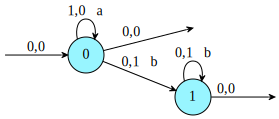

In [8]:
a = ab.automaton()
a

In [9]:
print(a.shortest(len = 4).format('list'))

<0,0>\e
<1,0>a
<0,1>b
<2,0>aa
<1,1>ab
<0,2>bb
<3,0>aaa
<2,1>aab
<1,2>abb
<0,3>bbb
<4,0>aaaa
<3,1>aaab
<2,2>aabb
<1,3>abbb
<0,4>bbbb


### Boss
The interpretation of the following monster is left to the reader as an exercise:

In [10]:
vcsn.context('''lat< lal<char(ba)>,
                                  lat< lal<char(vu)>, law<char(x-z)> >
                >
                ,
                lat<expressionset<lat<lal<char(fe)>, lal<char(hg)>>,
                                  lat<r, q>>,
                    lat<b, z>
                >
''')

{ab}? x {uv}? x {xyz}* -> RatE[{ef}? x {gh}? -> R x Q] x B x Z